# Ryhmä-190

## Python-paketit

In [1]:
# Jupyter-notebookissa voi asentaa paketit samaan tapaan kuin komentoriviltä.
# Tähän käytetään "magic commandeja", jotka alkavat %-merkillä.
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Tietoaineistojen lataaminen

In [3]:
df_train = pd.read_csv('../data/train.csv', encoding='utf-8', header=0)
df_test = pd.read_csv('../data/test.csv', encoding='utf-8', header=0)

In [4]:
# Esikatselu
df_train

ID  log_pSat_Pa          MW  NumOfAtoms  NumOfC  NumOfO  NumOfN  \
0          0   -11.295070  224.016832          23       6       9       0   
1          1    -4.782500  310.064845          35       9      10       2   
2          2    -6.204319  368.033938          37      10      13       2   
3          3    -9.672591  299.012475          29       7      12       1   
4          4    -4.252058  202.011353          20       7       7       0   
...      ...          ...         ...         ...     ...     ...     ...   
26632  31632    -1.210727  221.017166          22       6       8       1   
26633  31633    -7.525230  222.001182          21       6       9       0   
26634  31634    -8.852094  287.012475          28       6      12       1   
26635  31635    -6.564478  284.996825          26       6      12       1   
26636  31636    -2.796255  267.022645          27       7      10       1   

       NumHBondDonors  NumOfConf  NumOfConfUsed  ... ester  ether (alicyclic)  \
0                   4      485.0           40.0  ...     0                  1   
1                   1      236.0           40.0  ...     0                  0   
2                   1      308.0           40.0  ...     0                  0   
3                   4      769.0            3.0  ...     0                  0   
4                   1       77.0           32.0  ...     0                  1   
...               ...        ...            ...  ...   ...                ...   
26632               1       47.0           37.0  ...     0                  1   
26633               3      323.0           12.0  ...     0                  0   
26634               4      362.0           11.0  ...     0                  0   
26635               3      322.0           35.0  ...     0                  0   
26636               2      144.0           23.0  ...     0                  0   

       nitrate  nitro  aromatic hydroxyl  carbonylperoxynitrate  peroxide  \
0            0      0                  0                      0         0   
1            2      0                  0                      0         0   
2            1      0                  0                      1         0   
3            1      0                  0                      0         0   
4            0      0                  0                      0         0   
...        ...    ...                ...                    ...       ...   
26632        1      0                  0                      0         0   
26633        0      0                  0                      0         1   
26634        1      0                  0                      0         1   
26635        1      0                  0                      0         1   
26636        0      0                  0                      1         0   

       hydroperoxide  carbonylperoxyacid  nitroester  
0                  2                   0           0  
1                  1                   0           0  
2                  1                   0           0  
3                  1                   1           0  
4                  1                   0           0  
...              ...                 ...         ...  
26632              1                   0           0  
26633              0                   0           0  
26634              2                   0           0  
26635              1                   1           0  
26636              0                   1           0  

[26637 rows x 27 columns]

In [5]:
# Sarakkeiden nimet
list(df_train.columns)

['ID',
 'log_pSat_Pa',
 'MW',
 'NumOfAtoms',
 'NumOfC',
 'NumOfO',
 'NumOfN',
 'NumHBondDonors',
 'NumOfConf',
 'NumOfConfUsed',
 'parentspecies',
 'C=C (non-aromatic)',
 'C=C-C=O in non-aromatic ring',
 'hydroxyl (alkyl)',
 'aldehyde',
 'ketone',
 'carboxylic acid',
 'ester',
 'ether (alicyclic)',
 'nitrate',
 'nitro',
 'aromatic hydroxyl',
 'carbonylperoxynitrate',
 'peroxide',
 'hydroperoxide',
 'carbonylperoxyacid',
 'nitroester']

## Datan tutkiminen

Tänne voimme lisätä visualisointeja ja muuta, mikä auttaa hahmottamaan datan sisältöä, esimerkiksi lineaarisia ja ei-lineaarisia suhteita.

<Axes: xlabel='log_pSat_Pa', ylabel='Count'>

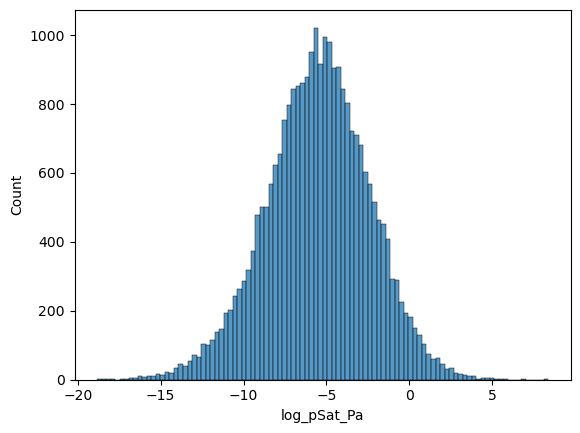

In [6]:
# Pelkän log_pSat_Pa jakauma
sns.histplot(df_train['log_pSat_Pa'])

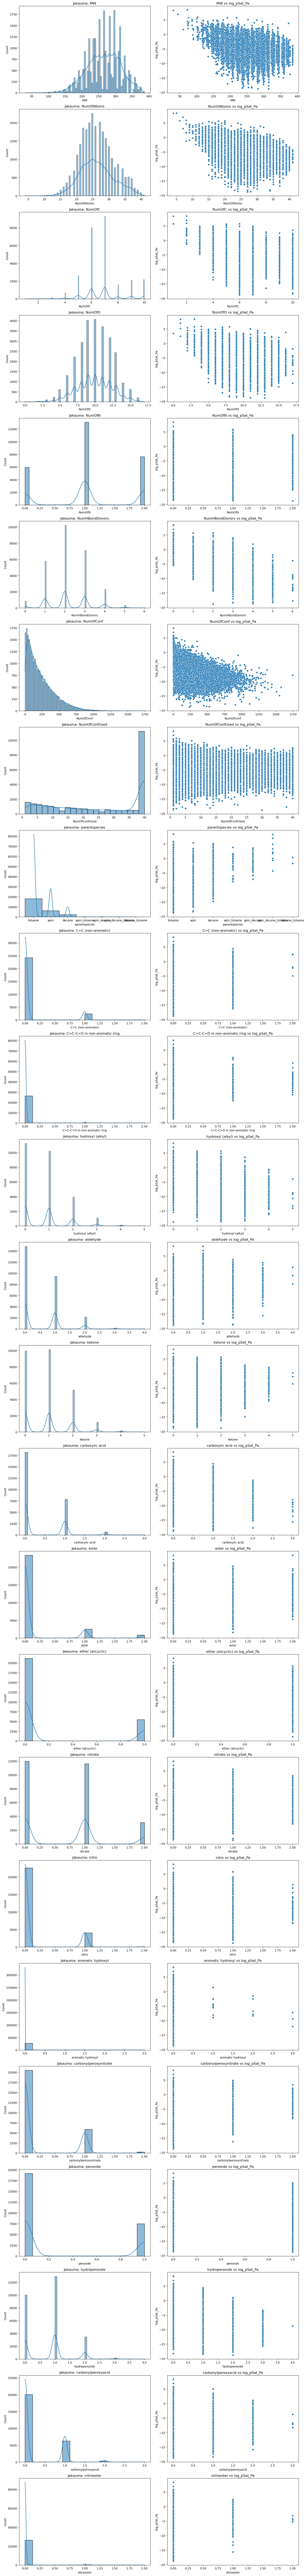

In [7]:
# Jokaisen muuttujan jakauma ja korrelaatio log_pSat_Pa kanssa
cols = df_train.drop(columns=['ID', 'log_pSat_Pa']).columns
num_cols = len(cols)
fig, axes = plt.subplots(num_cols, 2, figsize=(15, 5 * num_cols))

for i, column in enumerate(cols):
    sns.histplot(df_train[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Jakauma: {column}')
    
    sns.scatterplot(data=df_train, x=column, y='log_pSat_Pa', ax=axes[i, 1])
    axes[i, 1].set_title(f'{column} vs log_pSat_Pa')

plt.tight_layout()
plt.show()

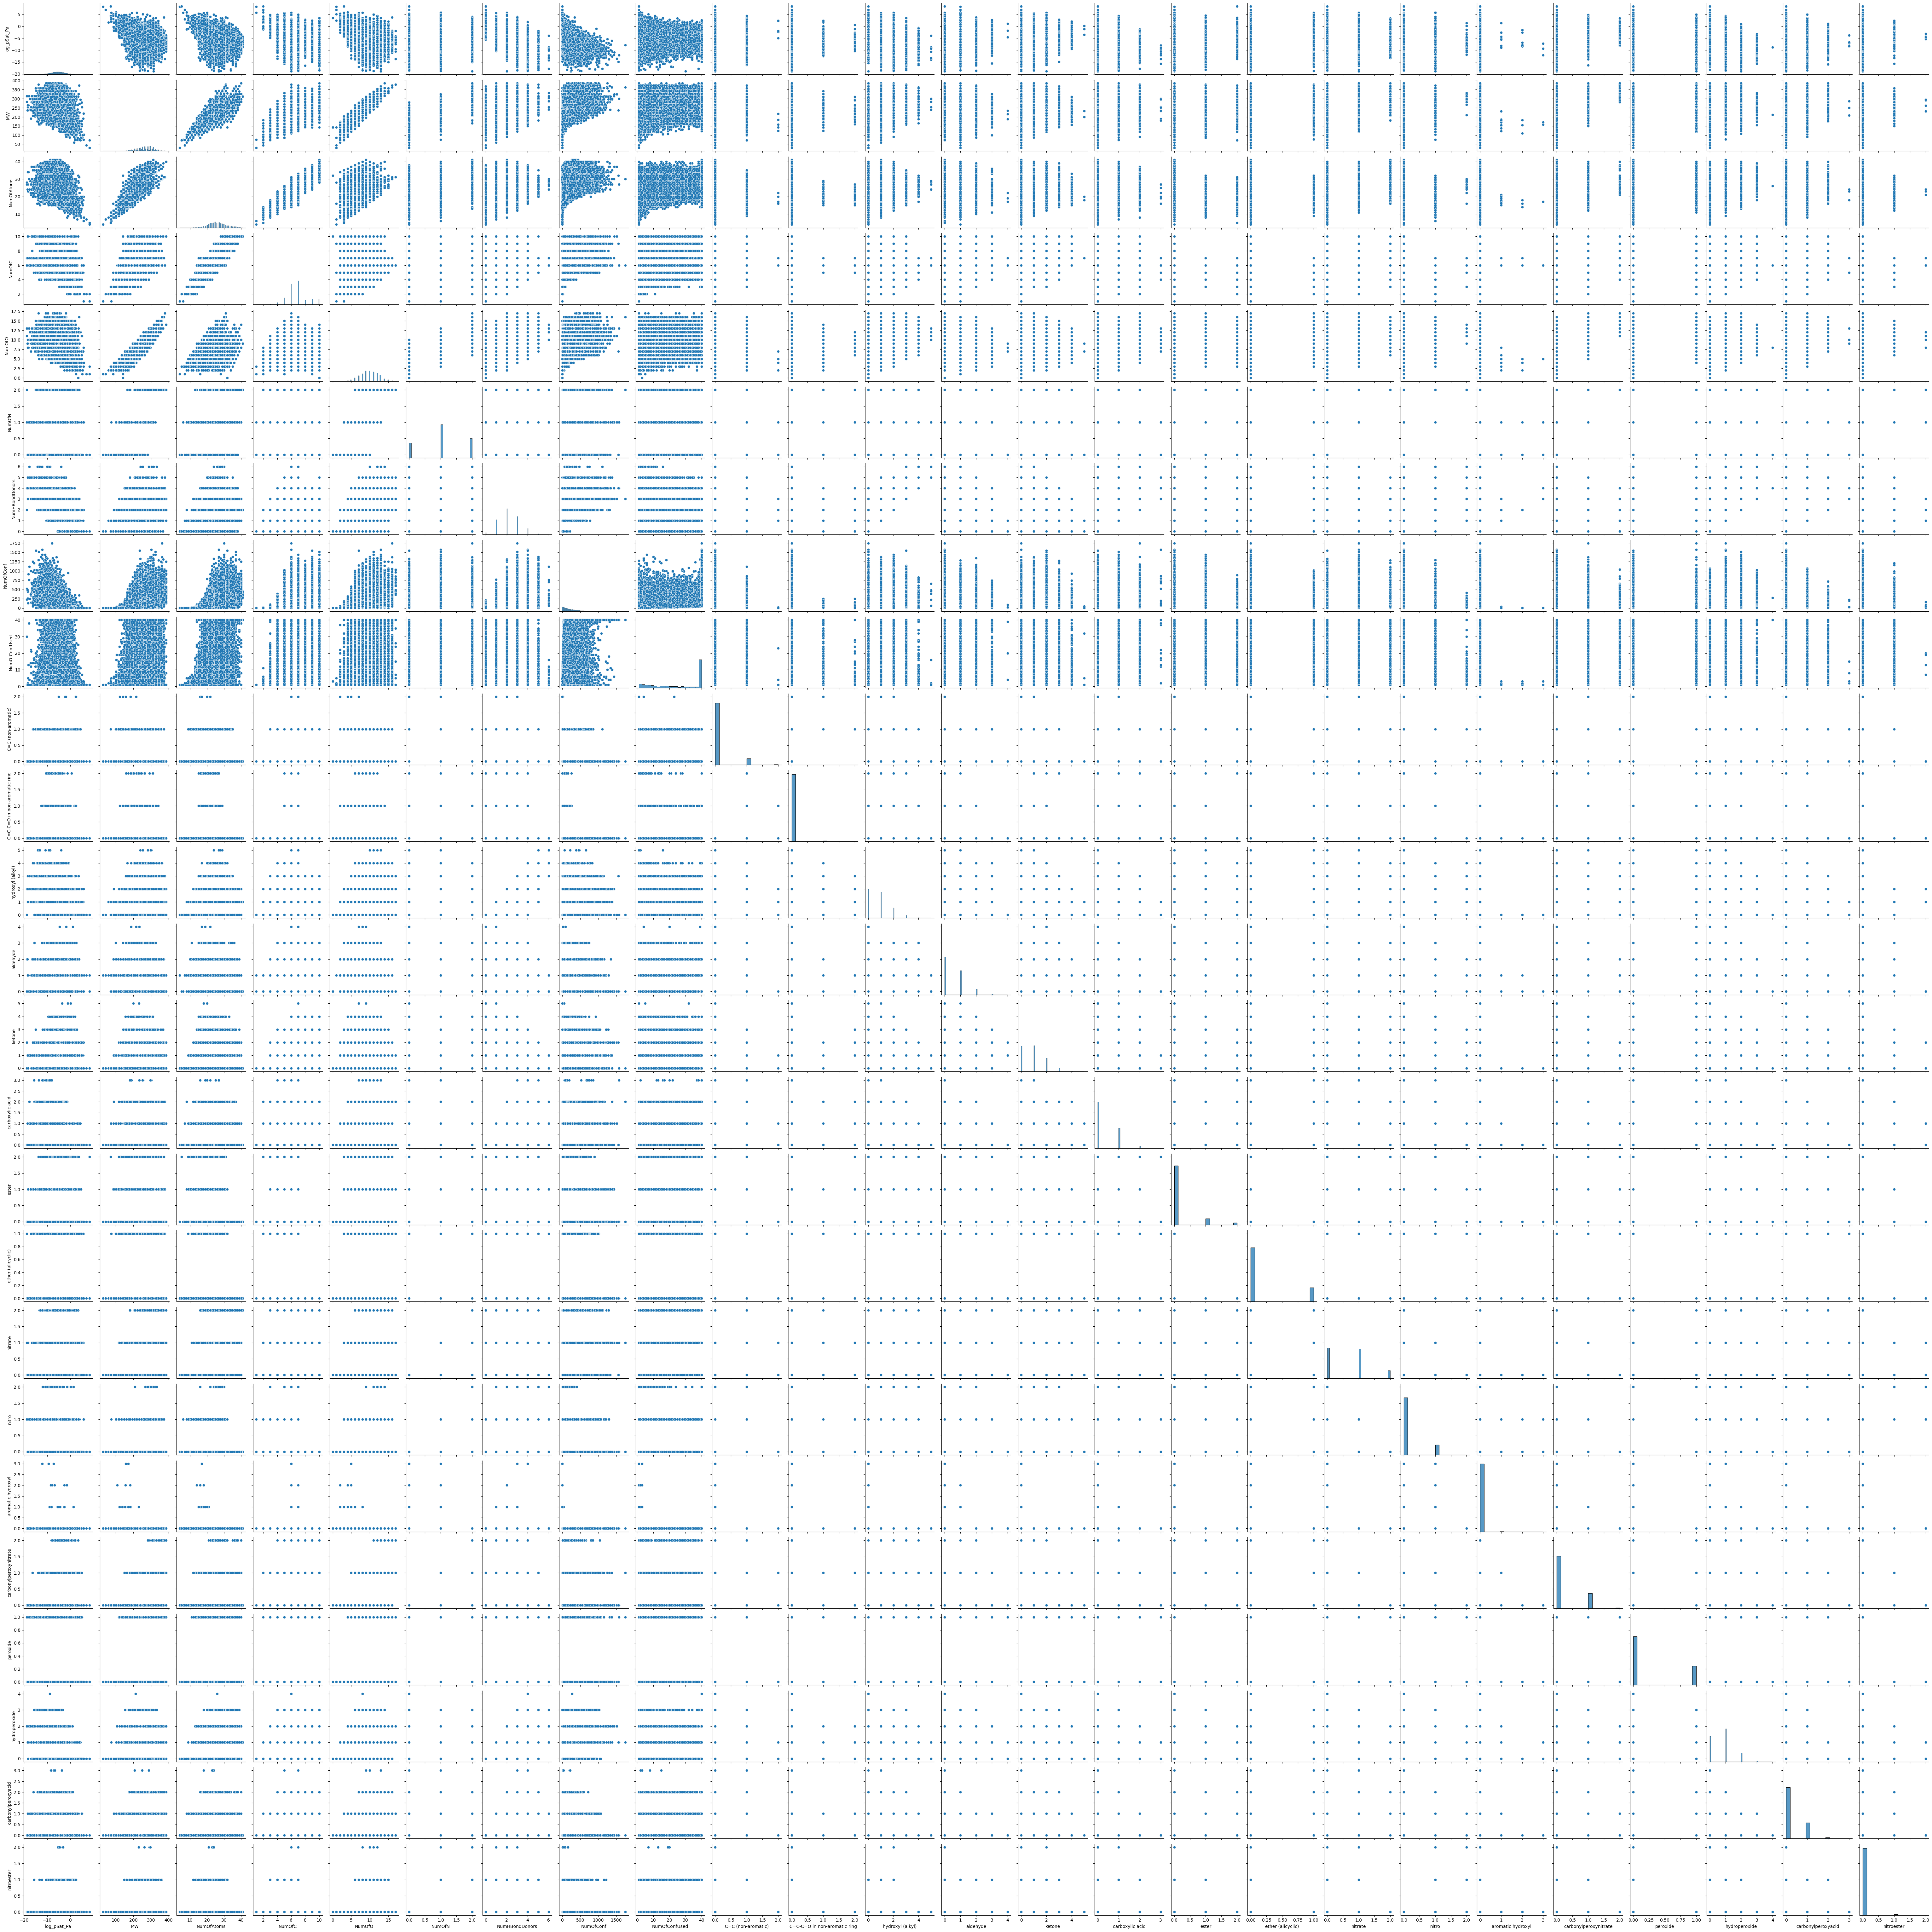

In [8]:
# Kaikkien muuttujien väliset korrelaatiot
sns.pairplot(df_train.drop(columns=['ID']), kind='scatter')

Strongest correlation between the target:
NumHBondDonors           0.689196
NumOfConf                0.513653
hydroperoxide            0.314053
hydroxyl (alkyl)         0.310452
NumOfAtoms               0.307337
carboxylic acid          0.304259
NumOfC                   0.262769
carbonylperoxynitrate    0.223739
MW                       0.199574
NumOfN                   0.183152
Name: log_pSat_Pa, dtype: float64
---------------------
Strongest correlation pairs: 
NumOfO                 MW                0.880358
NumOfC                 NumOfAtoms        0.838402
NumOfN                 MW                0.772575
NumOfAtoms             MW                0.707009
nitrate                NumOfN            0.687224
NumOfN                 NumOfO            0.656750
hydroxyl (alkyl)       NumHBondDonors    0.632023
carbonylperoxynitrate  NumOfO            0.510409
nitrate                NumOfAtoms        0.492108
NumOfN                 NumOfAtoms        0.491902
dtype: float64


<Axes: >

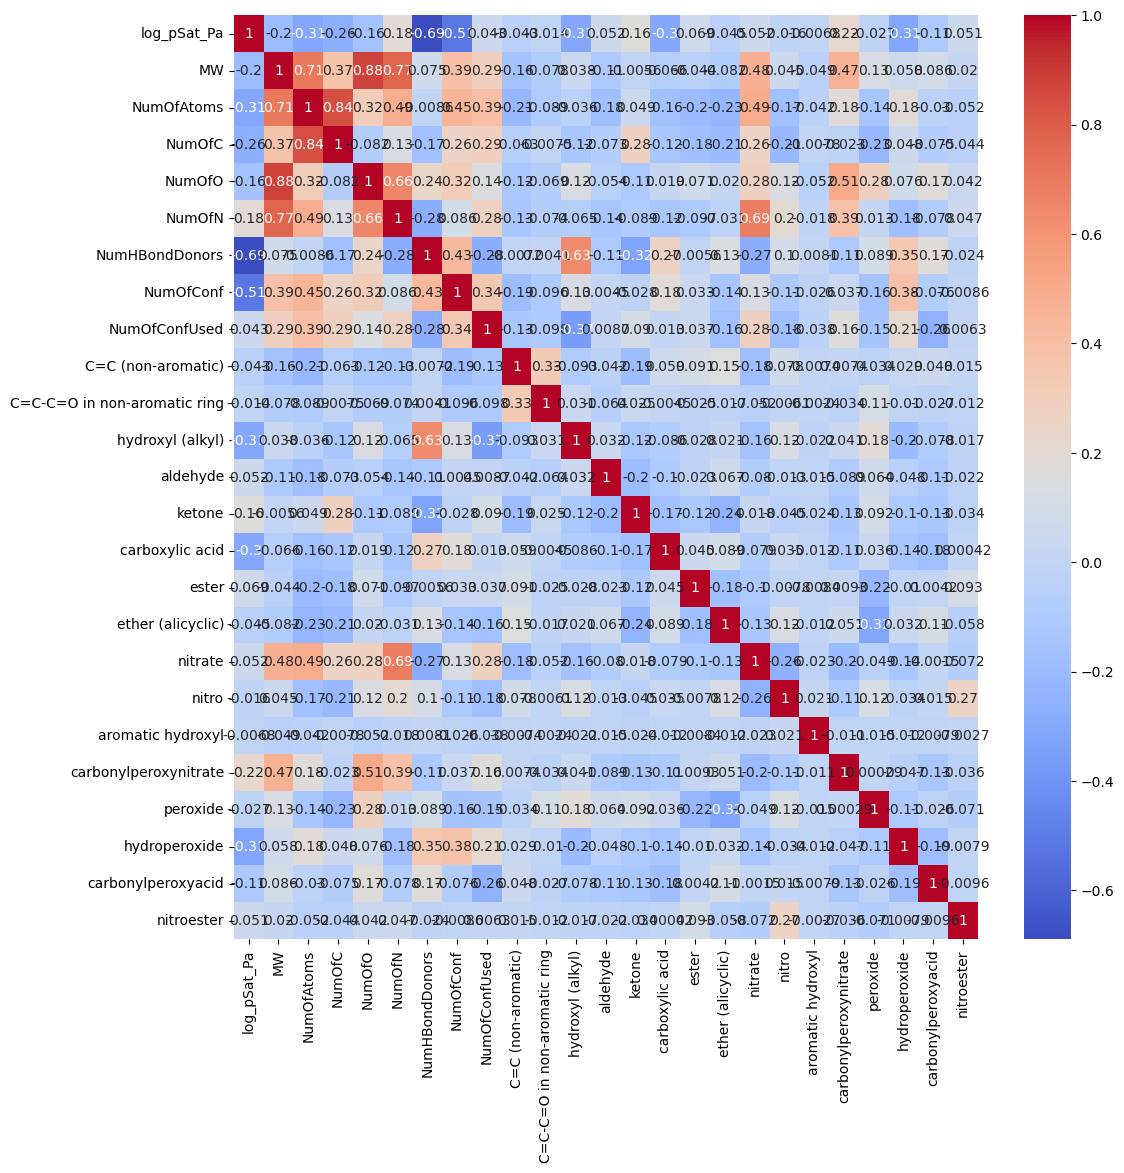

In [10]:
# Korrelaatiomatriisi
corr = df_train.drop(columns=['ID', 'parentspecies']).corr()
target_corr = corr['log_pSat_Pa']
strongest_corr = target_corr.abs().sort_values(ascending=False)
strongest_corr = strongest_corr.drop('log_pSat_Pa')
print(f"Strongest correlation between the target:\n{strongest_corr.head(10)}")
print("---------------------")
corr_without_target = df_train.drop(columns=['ID', 'parentspecies', 'log_pSat_Pa']).corr()
corr_pairs = corr_without_target.where(np.triu(np.ones(corr_without_target.shape), k=1).astype(bool))
sorted_pairs = corr_pairs.unstack().dropna().abs().sort_values(ascending=False)
print(f"Strongest correlation pairs: \n{sorted_pairs.head(10)}")

plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')